In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

(20,)
(20,)


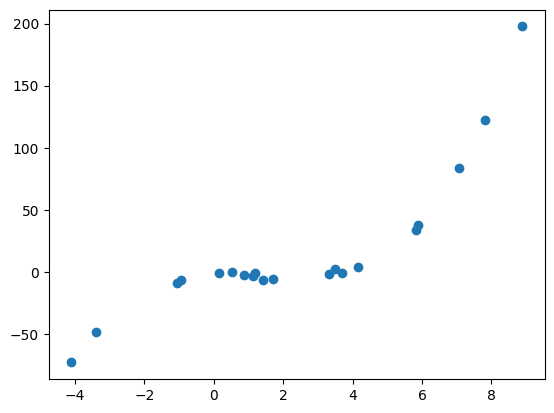

In [162]:
#lets create a random data set which is not linear

x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
print(x.shape)
print(y.shape)
plt.scatter(x,y)

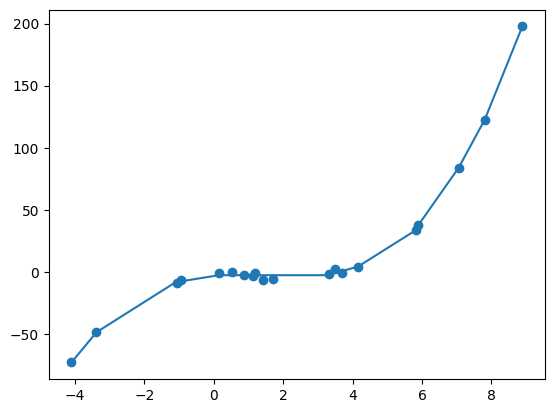

In [163]:
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x.reshape(-1,1),y)
preds = reg.predict(x.reshape(-1,1))

plt.scatter(x,y)
plt.plot(sorted(x),sorted(preds))

Text(0, 0.5, 'accuracy')

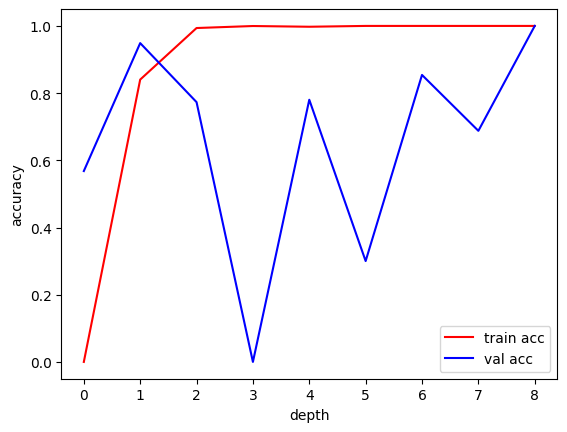

In [164]:
legends = []
plots = []
train_accs = []
testin_accs = []

max_depth = 10

for depth in range(1,max_depth):
    reg = DecisionTreeRegressor(max_depth=depth)
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.5)
    reg.fit(x_train.reshape(-1,1),y_train)
    preds = reg.predict(x.reshape(-1,1))

    plots.append([sorted(x),sorted(preds)])

    training_acc = reg.score(x_train.reshape(-1,1),y_train)
    testing_acc = reg.score(x_test.reshape(-1,1),y_test)
    legends.append("Max Depth "+str(depth))


    train_accs.append(training_acc)
    testin_accs.append(testing_acc)
    



rng1 = np.arange(0,len(train_accs))
rng2 = np.arange(0,len(testin_accs))

train_accs = np.array(train_accs)
test_accs = np.array(testin_accs)


minmax = MinMaxScaler()
train_accs = minmax.fit_transform(train_accs.reshape(-1,1)).flatten()
test_accs = minmax.fit_transform(test_accs.reshape(-1,1)).flatten()

plt.plot(rng1,train_accs,c='r')
plt.plot(rng2,test_accs,c='b')

plt.legend(["train acc","val acc"])
plt.xlabel("depth")
plt.ylabel("accuracy")

